# <font color='blk'><center>IMSE 586 Big Data Analytics and Visualization (Fall 2022)</center>

##  <font color='blk'><center>Team-18</center>

## <font color='blk'><center>Project : Predicting mortality with heart failure from patients in ICU</center>

In [1]:
# Importing of required iibraries and functions
import numpy as np
import pandas as pd
import seaborn as sns
import statsmodels.formula.api as smf
import matplotlib.pyplot as plt
from sklearn.impute import SimpleImputer
import plotly.express as px
%matplotlib inline
import statsmodels.formula.api as smf
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import cross_val_score
from sklearn import metrics
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report
from imblearn.over_sampling import SMOTE 
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

import warnings
warnings.filterwarnings('ignore')

## Reading Data into pandas dataframe

In [2]:
project = pd.read_csv('./data/Heart Failure .csv')
project

group      ID  outcome  age  gendera        BMI  hypertensive  \
0         1  125047      0.0   72        1  37.588179             0   
1         1  139812      0.0   75        2        NaN             0   
2         1  109787      0.0   83        2  26.572634             0   
3         1  130587      0.0   43        2  83.264629             0   
4         1  138290      0.0   75        2  31.824842             1   
...     ...     ...      ...  ...      ...        ...           ...   
1172      2  171130      0.0   62        1  25.516870             1   
1173      2  101659      0.0   78        1  25.822710             0   
1174      2  162069      0.0   85        2  23.891779             1   
1175      2  120967      0.0   79        2  35.288554             0   
1176      2  107636      0.0   47        1  23.121384             1   

      atrialfibrillation  CHD with no MI  diabetes  ...  Blood sodium  \
0                      0               0         1  ...    138.750000   
1                      0               0         0  ...    138.888889   
2                      0               0         0  ...    140.714286   
3                      0               0         0  ...    138.500000   
4                      0               0         0  ...    136.666667   
...                  ...             ...       ...  ...           ...   
1172                   1               0         1  ...    136.714286   
1173                   1               0         1  ...    135.680000   
1174                   1               0         1  ...    136.000000   
1175                   0               1         1  ...    140.000000   
1176                   0               0         1  ...    135.285714   

      Blood calcium    Chloride  Anion gap  Magnesium ion     PH  Bicarbonate  \
0          7.463636  109.166667  13.166667       2.618182  7.230    21.166667   
1          8.162500   98.444444  11.444444       1.887500  7.225    33.444444   
2          8.266667  105.857143  10.000000       2.157143  7.268    30.571429   
3          9.476923   92.071429  12.357143       1.942857  7.370    38.571429   
4          8.733333  104.500000  15.166667       1.650000  7.250    22.000000   
...             ...         ...        ...            ...    ...          ...   
1172      10.271429   94.428571  20.142857       2.714286    NaN    27.714286   
1173      10.523529  101.720000  18.160000       2.012500    NaN    20.480000   
1174       8.466667   97.285714  14.000000       2.028571    NaN    28.857143   
1175       8.183333  104.000000  15.750000       2.090000    NaN    24.375000   
1176       9.085714   93.857143  20.285714       2.566667    NaN    26.571429   

      Lactic acid  PCO2  EF  
0             0.5  40.0  55  
1             0.5  78.0  55  
2             0.5  71.5  35  
3             0.6  75.0  55  
4             0.6  50.0  55  
...           ...   ...  ..  
1172          NaN   NaN  40  
1173          NaN   NaN  30  
1174          NaN   NaN  55  
1175          NaN   NaN  25  
1176          NaN   NaN  55  

[1177 rows x 51 columns]

In [3]:
# Checking for null values
project.isnull().sum()

group                         0
ID                            0
outcome                       1
age                           0
gendera                       0
BMI                         215
hypertensive                  0
atrialfibrillation            0
CHD with no MI                0
diabetes                      0
deficiencyanemias             0
depression                    0
Hyperlipemia                  0
Renal failure                 0
COPD                          0
heart rate                   13
Systolic blood pressure      16
Diastolic blood pressure     16
Respiratory rate             13
temperature                  19
SP O2                        13
Urine output                 36
hematocrit                    0
RBC                           0
MCH                           0
MCHC                          0
MCV                           0
RDW                           0
Leucocyte                     0
Platelets                     0
Neutrophils                 144
Basophil

In [4]:
#checking for duplicates
project.duplicated().sum().sum()

0

In [5]:
project[['Neutrophils','Basophils','Lymphocyte','Creatine kinase','PH','Lactic acid','PCO2']]

Neutrophils  Basophils  Lymphocyte  Creatine kinase     PH  Lactic acid  \
0           74.65       0.40       13.30       148.000000  7.230          0.5   
1             NaN        NaN         NaN        60.600000  7.225          0.5   
2           68.10       0.55       24.50        16.000000  7.268          0.5   
3           81.80       0.15       14.50        85.000000  7.370          0.6   
4             NaN        NaN         NaN       111.666667  7.250          0.6   
...           ...        ...         ...              ...    ...          ...   
1172        81.55       0.70       10.65       129.500000    NaN          NaN   
1173        84.58       0.80        7.70        34.000000    NaN          NaN   
1174        65.90       0.40       24.40        98.000000    NaN          NaN   
1175        79.85       0.30       13.20        24.333333    NaN          NaN   
1176        77.00       0.10       13.90        73.000000    NaN          NaN   

      PCO2  
0     40.0  
1     78.0  
2     71.5  
3     75.0  
4     50.0  
...    ...  
1172   NaN  
1173   NaN  
1174   NaN  
1175   NaN  
1176   NaN  

[1177 rows x 7 columns]

## Using simple imputer to replace null values in the Dataset

In [6]:
project['Creatine kinase'] = SimpleImputer(strategy = 'median').fit_transform(project[['Creatine kinase']])
project['temperature'] = SimpleImputer(strategy = 'median').fit_transform(project[['temperature']])

project['PH'] = SimpleImputer(strategy = 'most_frequent').fit_transform(project[['PH']])
project['Lactic acid'] = SimpleImputer(strategy = 'median').fit_transform(project[['Lactic acid']])
project['PCO2'] = SimpleImputer(strategy = 'median').fit_transform(project[['PCO2']])

project['Basophils'] = SimpleImputer(strategy = 'median').fit_transform(project[['Basophils']])

project['BMI'] = SimpleImputer(strategy = 'median').fit_transform(project[['BMI']])

project['Lymphocyte'] = SimpleImputer(strategy = 'median').fit_transform(project[['Lymphocyte']])

project['Neutrophils'] = SimpleImputer(strategy = 'median').fit_transform(project[['Neutrophils']])

In [7]:
project.isnull().sum()

group                        0
ID                           0
outcome                      1
age                          0
gendera                      0
BMI                          0
hypertensive                 0
atrialfibrillation           0
CHD with no MI               0
diabetes                     0
deficiencyanemias            0
depression                   0
Hyperlipemia                 0
Renal failure                0
COPD                         0
heart rate                  13
Systolic blood pressure     16
Diastolic blood pressure    16
Respiratory rate            13
temperature                  0
SP O2                       13
Urine output                36
hematocrit                   0
RBC                          0
MCH                          0
MCHC                         0
MCV                          0
RDW                          0
Leucocyte                    0
Platelets                    0
Neutrophils                  0
Basophils                    0
Lymphocy

In [8]:
project.dropna(subset = ['ID','Urine output', 'INR', 'PT', 'Systolic blood pressure', 'Diastolic blood pressure', 'heart rate', 'Respiratory rate','glucose','Blood calcium' ], inplace = True)

project.head(7)

group      ID  outcome  age  gendera        BMI  hypertensive  \
0      1  125047      0.0   72        1  37.588179             0   
2      1  109787      0.0   83        2  26.572634             0   
3      1  130587      0.0   43        2  83.264629             0   
5      1  154653      0.0   76        1  24.262293             1   
6      1  194420      0.0   72        1  39.667426             1   
7      1  153461      0.0   83        2  22.311111             1   
8      1  113076      0.0   61        2  19.992243             1   

   atrialfibrillation  CHD with no MI  diabetes  ...  Blood sodium  \
0                   0               0         1  ...    138.750000   
2                   0               0         0  ...    140.714286   
3                   0               0         0  ...    138.500000   
5                   1               0         0  ...    136.250000   
6                   0               0         0  ...    144.133333   
7                   1               0         1  ...    140.000000   
8                   1               0         1  ...    141.090909   

   Blood calcium    Chloride  Anion gap  Magnesium ion        PH  Bicarbonate  \
0       7.463636  109.166667  13.166667       2.618182  7.230000    21.166667   
2       8.266667  105.857143  10.000000       2.157143  7.268000    30.571429   
3       9.476923   92.071429  12.357143       1.942857  7.370000    38.571429   
5       8.466667   96.750000  13.125000       1.771429  7.310000    30.500000   
6       8.775000  106.666667  15.200000       1.875000  7.169231    26.800000   
7       9.171429  104.250000  12.571429       2.187500  7.550000    27.571429   
8       9.443750  103.181818  16.863636       2.035294  7.360000    25.772727   

   Lactic acid       PCO2  EF  
0     0.500000  40.000000  55  
2     0.500000  71.500000  35  
3     0.600000  75.000000  55  
5     0.600000  65.500000  35  
6     0.625000  69.769231  55  
7     0.650000  31.333333  75  
8     0.666667  46.000000  50  

[7 rows x 51 columns]

In [9]:
project.isnull().sum()

group                       0
ID                          0
outcome                     0
age                         0
gendera                     0
BMI                         0
hypertensive                0
atrialfibrillation          0
CHD with no MI              0
diabetes                    0
deficiencyanemias           0
depression                  0
Hyperlipemia                0
Renal failure               0
COPD                        0
heart rate                  0
Systolic blood pressure     0
Diastolic blood pressure    0
Respiratory rate            0
temperature                 0
SP O2                       0
Urine output                0
hematocrit                  0
RBC                         0
MCH                         0
MCHC                        0
MCV                         0
RDW                         0
Leucocyte                   0
Platelets                   0
Neutrophils                 0
Basophils                   0
Lymphocyte                  0
PT        

In [10]:
project.columns

Index(['group', 'ID', 'outcome', 'age', 'gendera', 'BMI', 'hypertensive',
       'atrialfibrillation', 'CHD with no MI', 'diabetes', 'deficiencyanemias',
       'depression', 'Hyperlipemia', 'Renal failure', 'COPD', 'heart rate',
       'Systolic blood pressure', 'Diastolic blood pressure',
       'Respiratory rate', 'temperature', 'SP O2', 'Urine output',
       'hematocrit', 'RBC', 'MCH', 'MCHC', 'MCV', 'RDW', 'Leucocyte',
       'Platelets', 'Neutrophils', 'Basophils', 'Lymphocyte', 'PT', 'INR',
       'NT-proBNP', 'Creatine kinase', 'Creatinine', 'Urea nitrogen',
       'glucose', 'Blood potassium', 'Blood sodium', 'Blood calcium',
       'Chloride', 'Anion gap', 'Magnesium ion', 'PH', 'Bicarbonate',
       'Lactic acid', 'PCO2', 'EF'],
      dtype='object')

In [11]:
# Renaming columns names which has spaces with underscore
project.rename(columns = {"gendera" : "gender",
                          "CHD with no MI" : "CHD_with_no_MI",
                          "Blood potassium" : "Blood_potassium",
                          "Hyperlipemia":"hyperlipemia",
                          "Renal failure":"Renal_failure",
                          "SP O2":"SP O2",
                          "Creatine kinase":"Creatine_kinase",
                          "Urea nitrogen":"Urea_nitrogen",
                          "Blood sodium":"Blood_sodium",
                          "Blood calcium":"Blood_calcium",
                          "Urine output" : "Urine_output",
                          "Anion gap":"Anion_gap",
                          "Lactic acid":"Lactic_acid",
                          "Magnesium ion":"Magnesium_ion",
                          "Respiratory rate" :"Respiratory_rate",
                          "SP O2":"SP_O2",
                          "Diastolic blood pressure" : "Diastolic_blood_pressure",
                          "Systolic blood pressure" : "Systolic_blood_pressure",
                          "NT-proBNP": "NT_proBNP",
                          "heart rate" : "heart_rate",
                         },inplace = True)
project.head()

group      ID  outcome  age  gender        BMI  hypertensive  \
0      1  125047      0.0   72       1  37.588179             0   
2      1  109787      0.0   83       2  26.572634             0   
3      1  130587      0.0   43       2  83.264629             0   
5      1  154653      0.0   76       1  24.262293             1   
6      1  194420      0.0   72       1  39.667426             1   

   atrialfibrillation  CHD_with_no_MI  diabetes  ...  Blood_sodium  \
0                   0               0         1  ...    138.750000   
2                   0               0         0  ...    140.714286   
3                   0               0         0  ...    138.500000   
5                   1               0         0  ...    136.250000   
6                   0               0         0  ...    144.133333   

   Blood_calcium    Chloride  Anion_gap  Magnesium_ion        PH  Bicarbonate  \
0       7.463636  109.166667  13.166667       2.618182  7.230000    21.166667   
2       8.266667  105.857143  10.000000       2.157143  7.268000    30.571429   
3       9.476923   92.071429  12.357143       1.942857  7.370000    38.571429   
5       8.466667   96.750000  13.125000       1.771429  7.310000    30.500000   
6       8.775000  106.666667  15.200000       1.875000  7.169231    26.800000   

   Lactic_acid       PCO2  EF  
0        0.500  40.000000  55  
2        0.500  71.500000  35  
3        0.600  75.000000  55  
5        0.600  65.500000  35  
6        0.625  69.769231  55  

[5 rows x 51 columns]

In [12]:
X=project.iloc[:,:51]
y=project['outcome']
X

group      ID  outcome  age  gender        BMI  hypertensive  \
0         1  125047      0.0   72       1  37.588179             0   
2         1  109787      0.0   83       2  26.572634             0   
3         1  130587      0.0   43       2  83.264629             0   
5         1  154653      0.0   76       1  24.262293             1   
6         1  194420      0.0   72       1  39.667426             1   
...     ...     ...      ...  ...     ...        ...           ...   
1166      2  174899      0.0   78       1  23.296976             0   
1169      2  198933      0.0   88       2  26.571482             1   
1170      2  187991      0.0   79       1  24.221453             1   
1174      2  162069      0.0   85       2  23.891779             1   
1175      2  120967      0.0   79       2  35.288554             0   

      atrialfibrillation  CHD_with_no_MI  diabetes  ...  Blood_sodium  \
0                      0               0         1  ...    138.750000   
2                      0               0         0  ...    140.714286   
3                      0               0         0  ...    138.500000   
5                      1               0         0  ...    136.250000   
6                      0               0         0  ...    144.133333   
...                  ...             ...       ...  ...           ...   
1166                   0               0         0  ...    138.625000   
1169                   0               0         1  ...    145.000000   
1170                   1               0         0  ...    138.000000   
1174                   1               0         1  ...    136.000000   
1175                   0               1         1  ...    140.000000   

      Blood_calcium    Chloride  Anion_gap  Magnesium_ion        PH  \
0          7.463636  109.166667  13.166667       2.618182  7.230000   
2          8.266667  105.857143  10.000000       2.157143  7.268000   
3          9.476923   92.071429  12.357143       1.942857  7.370000   
5          8.466667   96.750000  13.125000       1.771429  7.310000   
6          8.775000  106.666667  15.200000       1.875000  7.169231   
...             ...         ...        ...            ...       ...   
1166       8.085714  106.000000  13.750000       1.987500  7.380000   
1169       8.037500  111.100000  12.200000       2.150000  7.490000   
1170       8.366667   98.625000  11.750000       1.685714  7.380000   
1174       8.466667   97.285714  14.000000       2.028571  7.380000   
1175       8.183333  104.000000  15.750000       2.090000  7.380000   

      Bicarbonate  Lactic_acid       PCO2  EF  
0       21.166667        0.500  40.000000  55  
2       30.571429        0.500  71.500000  35  
3       38.571429        0.600  75.000000  55  
5       30.500000        0.600  65.500000  35  
6       26.800000        0.625  69.769231  55  
...           ...          ...        ...  ..  
1166    23.125000        1.600  43.000000  55  
1169    25.600000        1.600  33.000000  39  
1170    31.625000        1.600  43.000000  40  
1174    28.857143        1.600  43.000000  55  
1175    24.375000        1.600  43.000000  25  

[1111 rows x 51 columns]

# Data Visualizations and EDA

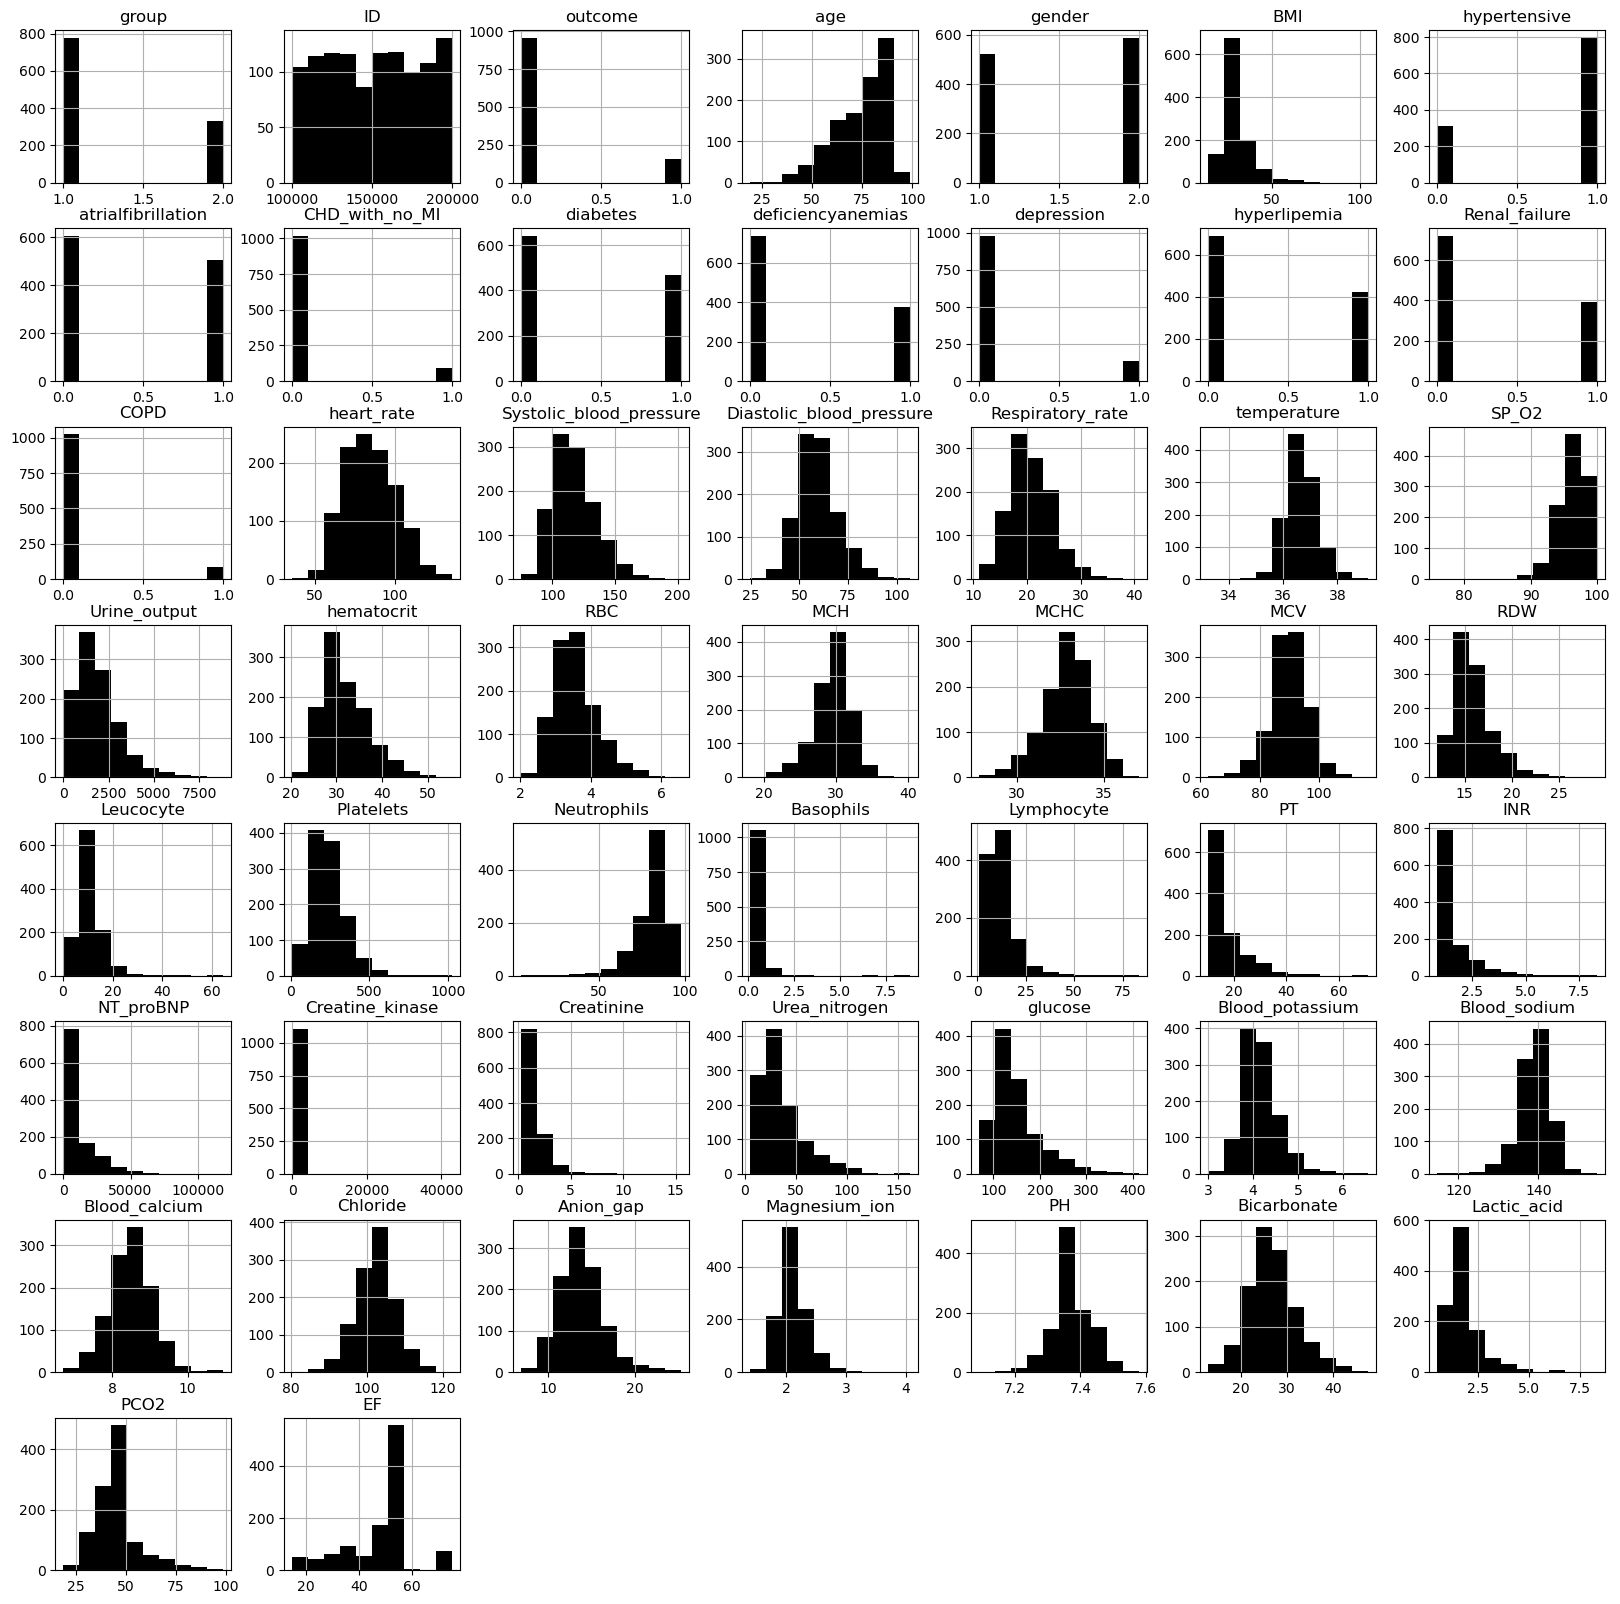

In [13]:
# Data Distribution for each attribute

project.hist(figsize=(20,20),histtype='barstacked',color='k')
plt.show()

In [14]:
# Summary statistics for numerical columns by outcome group
overall_stats = project.groupby('outcome').describe()

# Proportion of live (0) and dead (1) cases
outcome_counts = project['outcome'].value_counts(normalize=True)

print(overall_stats)

print(outcome_counts)

         group                                                  ID  \
         count      mean       std  min  25%  50%  75%  max  count   
outcome                                                              
0.0      957.0  1.303030  0.459809  1.0  1.0  1.0  2.0  2.0  957.0   
1.0      154.0  1.272727  0.446815  1.0  1.0  1.0  2.0  2.0  154.0   

                        ...       PCO2           EF                        \
                  mean  ...        75%   max  count       mean        std   
outcome                 ...                                                 
0.0      150218.769070  ...  47.666667  98.6  957.0  48.796238  12.640312   
1.0      153851.519481  ...  47.376984  93.0  154.0  48.149351  14.829657   

                                       
          min   25%   50%   75%   max  
outcome                                
0.0      15.0  40.0  55.0  55.0  75.0  
1.0      15.0  35.0  55.0  55.0  75.0  

[2 rows x 400 columns]
0.0    0.861386
1.0    0.138614
Name: o

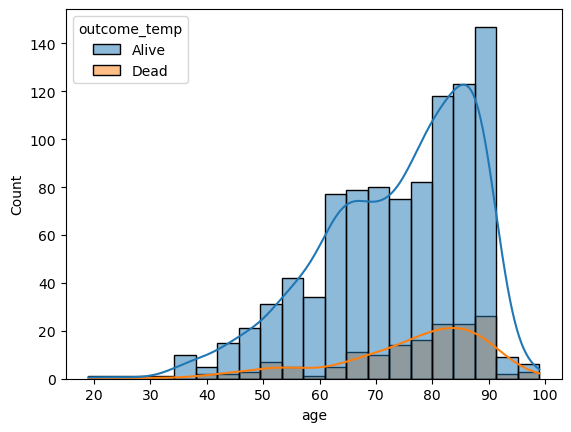

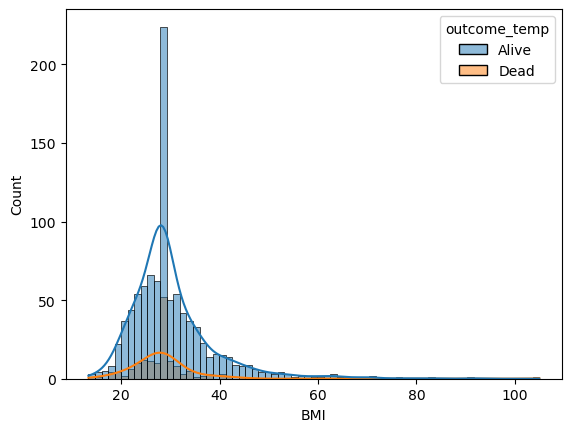

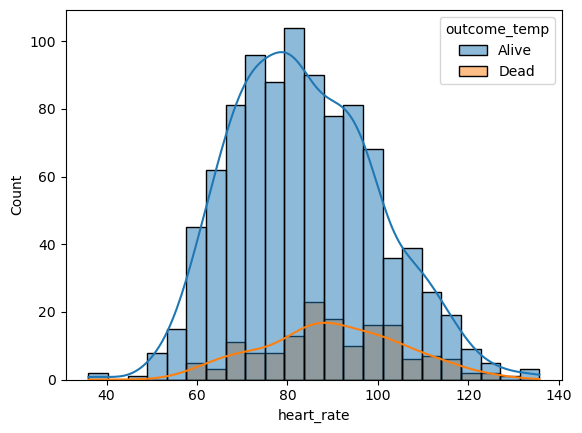

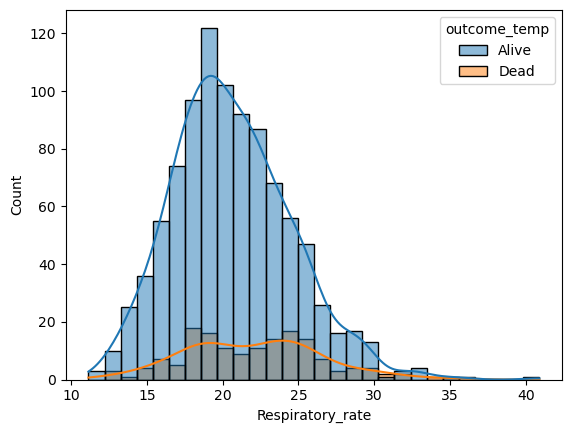

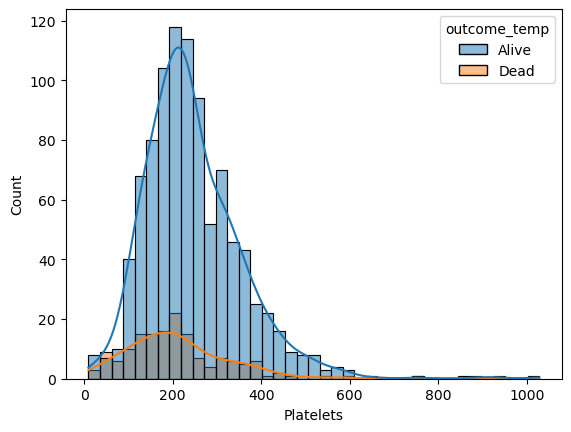

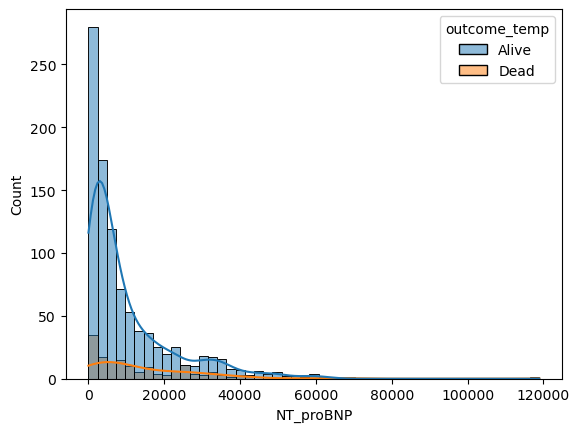

In [15]:
# Histograms for some attributes comparing with outcome
project['outcome_temp'] = project['outcome'].replace({0: 'Alive', 1: 'Dead'})
sns.histplot(data=project, x='age', hue='outcome_temp', kde=True)
plt.show()
sns.histplot(data=project, x='BMI', hue='outcome_temp', kde=True)
plt.show()
sns.histplot(data=project, x='heart_rate', hue='outcome_temp', kde=True)
plt.show()
sns.histplot(data=project, x='Respiratory_rate', hue='outcome_temp', kde=True)
plt.show()
sns.histplot(data=project, x='Platelets', hue='outcome_temp', kde=True)
plt.show()
sns.histplot(data=project, x='NT_proBNP', hue='outcome_temp', kde=True)
plt.show()
project.drop('outcome_temp', axis=1, inplace=True)

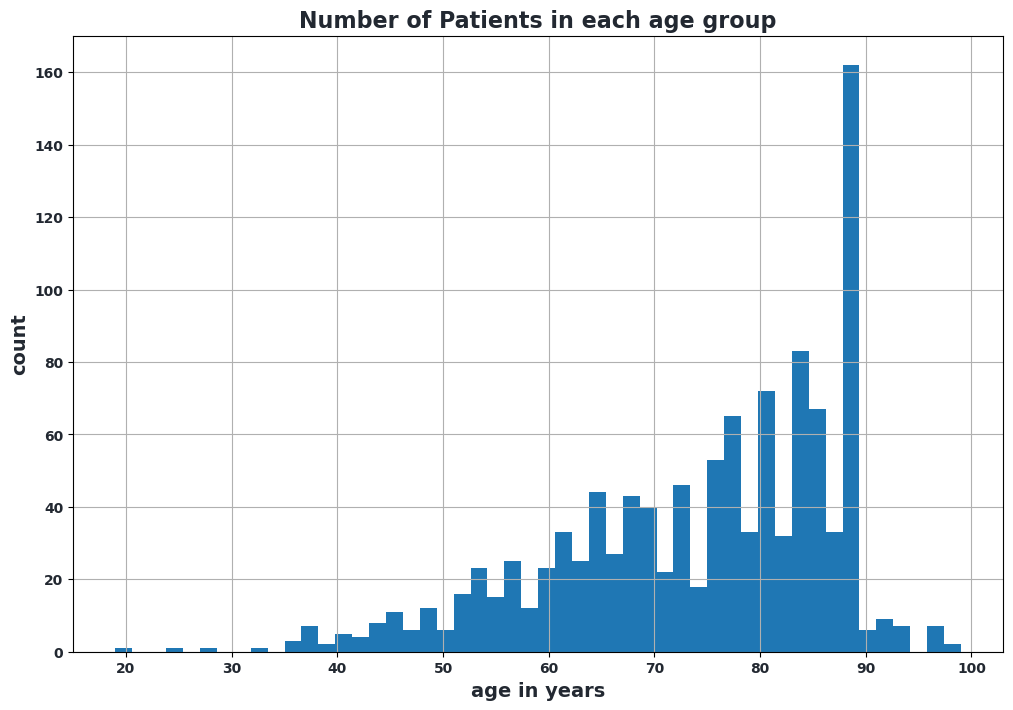

In [16]:
# Patients by age group in the dataset

project.age.hist(bins = 50, figsize=(12,8))
plt.xticks(color="#222831", weight='bold',size=10)
plt.yticks(color="#222831", weight='bold',size=10)
plt.title('Number of Patients in each age group',color="#222831", weight='bold', size=16)
plt.xlabel('age in years',color="#222831", fontweight='bold', size=14)
plt.ylabel('count',color="#222831", weight='bold', size=14)
plt.show()

## Strip plots

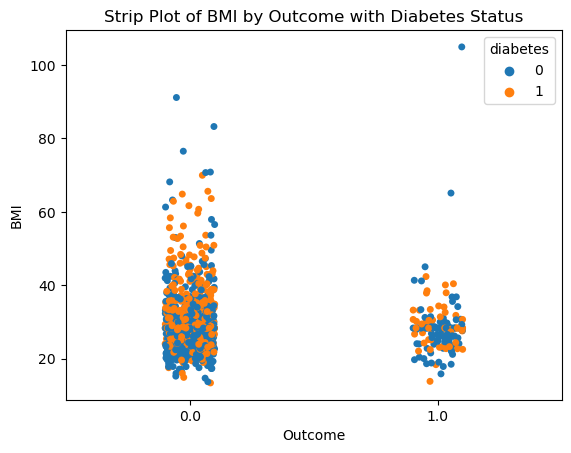

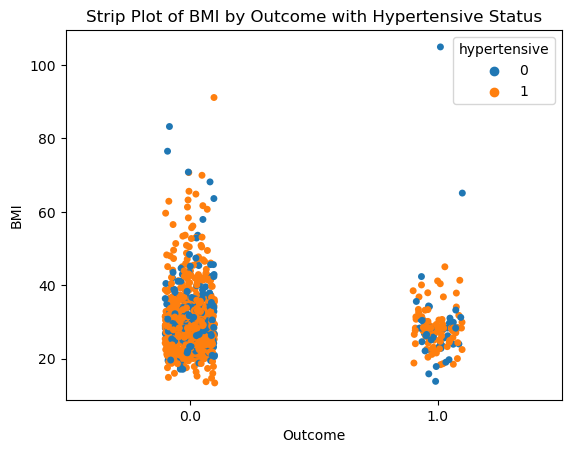

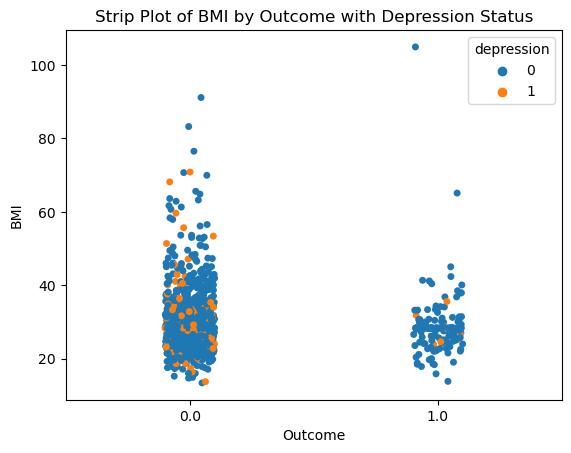

In [17]:
sns.stripplot(x='outcome', y='BMI', data=project, jitter=True, hue='diabetes')

plt.title('Strip Plot of BMI by Outcome with Diabetes Status')
plt.xlabel('Outcome')
plt.ylabel('BMI')
plt.legend(title='diabetes')
plt.show()
sns.stripplot(x='outcome', y='BMI', data=project, jitter=True, hue='hypertensive')
plt.title('Strip Plot of BMI by Outcome with Hypertensive Status')
plt.xlabel('Outcome')
plt.ylabel('BMI')
plt.legend(title='hypertensive')
plt.show()
sns.stripplot(x='outcome', y='BMI', data=project, jitter=True, hue='depression')
plt.title('Strip Plot of BMI by Outcome with Depression Status')
plt.xlabel('Outcome')
plt.ylabel('BMI')
plt.legend(title='depression')
plt.show()

## Correlation chart and Heat map

In [18]:
correlation=project.corr().round(2)
correlation

group    ID  outcome   age  gender   BMI  \
group                      1.00 -0.00    -0.02 -0.01    0.02 -0.04   
ID                        -0.00  1.00     0.04 -0.03   -0.03  0.04   
outcome                   -0.02  0.04     1.00  0.06   -0.02 -0.06   
age                       -0.01 -0.03     0.06  1.00    0.08 -0.36   
gender                     0.02 -0.03    -0.02  0.08    1.00  0.01   
BMI                       -0.04  0.04    -0.06 -0.36    0.01  1.00   
hypertensive              -0.06 -0.00    -0.07  0.19    0.01 -0.03   
atrialfibrillation         0.00 -0.01     0.09  0.29   -0.04 -0.11   
CHD_with_no_MI             0.02  0.04    -0.01  0.04   -0.08 -0.06   
diabetes                   0.02  0.03    -0.05 -0.09   -0.03  0.15   
deficiencyanemias          0.01 -0.03    -0.10  0.02    0.07 -0.02   
depression                 0.03  0.04    -0.07 -0.10    0.08  0.02   
hyperlipemia               0.03 -0.02    -0.06  0.11   -0.03 -0.01   
Renal_failure             -0.01 -0.05    -0.10  0.12   -0.08 -0.03   
COPD                      -0.00 -0.00    -0.05 -0.01   -0.08  0.01   
heart_rate                 0.01  0.03     0.14 -0.21   -0.01 -0.02   
Systolic_blood_pressure   -0.07  0.04    -0.13 -0.03    0.08  0.09   
Diastolic_blood_pressure  -0.01  0.05    -0.09 -0.35   -0.13  0.14   
Respiratory_rate           0.00 -0.02     0.12 -0.04   -0.05 -0.04   
temperature               -0.02 -0.01    -0.09 -0.20   -0.01  0.07   
SP_O2                      0.03  0.02    -0.06  0.06    0.02 -0.17   
Urine_output              -0.01  0.03    -0.17 -0.24   -0.14  0.26   
hematocrit                 0.04 -0.00    -0.02 -0.02   -0.11  0.12   
RBC                        0.05  0.00    -0.03 -0.05   -0.09  0.15   
MCH                       -0.03 -0.01     0.02  0.08   -0.06 -0.13   
MCHC                      -0.02  0.01    -0.02  0.02   -0.08 -0.11   
MCV                       -0.03 -0.02     0.04  0.08   -0.03 -0.09   
RDW                       -0.04 -0.01     0.15 -0.05    0.02  0.05   
Leucocyte                 -0.00 -0.01     0.21  0.01   -0.01 -0.06   
Platelets                  0.00 -0.01    -0.10 -0.04    0.10 -0.05   
Neutrophils                0.02  0.00     0.06  0.12    0.02 -0.09   
Basophils                 -0.04 -0.02    -0.02 -0.08   -0.03  0.04   
Lymphocyte                 0.01 -0.02    -0.13 -0.12    0.03  0.08   
PT                         0.02 -0.01     0.13  0.09   -0.08 -0.00   
INR                        0.02 -0.01     0.14  0.10   -0.08 -0.00   
NT_proBNP                 -0.03  0.02     0.13  0.07    0.03 -0.17   
Creatine_kinase           -0.02  0.03     0.07 -0.02    0.03  0.04   
Creatinine                -0.02 -0.02     0.06 -0.07   -0.12  0.02   
Urea_nitrogen              0.00 -0.02     0.21  0.10   -0.10 -0.03   
glucose                    0.02  0.05     0.03 -0.10    0.04  0.12   
Blood_potassium           -0.00  0.02     0.14 -0.07   -0.05  0.05   
Blood_sodium               0.03 -0.03    -0.06  0.11    0.03  0.04   
Blood_calcium              0.04 -0.01    -0.18 -0.00    0.07  0.09   
Chloride                   0.01 -0.02     0.06  0.13   -0.00 -0.18   
Anion_gap                  0.00 -0.01     0.24  0.00   -0.04 -0.11   
Magnesium_ion              0.01 -0.02     0.08  0.09   -0.03  0.01   
PH                        -0.06 -0.00    -0.15  0.10   -0.06 -0.11   
Bicarbonate                0.01  0.00    -0.22 -0.05    0.04  0.27   
Lactic_acid                0.00  0.01     0.22  0.01    0.00 -0.08   
PCO2                      -0.00  0.00    -0.03 -0.12    0.07  0.29   
EF                        -0.01  0.02    -0.02  0.06    0.17  0.06   

                          hypertensive  atrialfibrillation  CHD_with_no_MI  \
group                            -0.06                0.00            0.02   
ID                               -0.00               -0.01            0.04   
outcome                          -0.07                0.09           -0.01   
age                               0.19                0.29            0.0

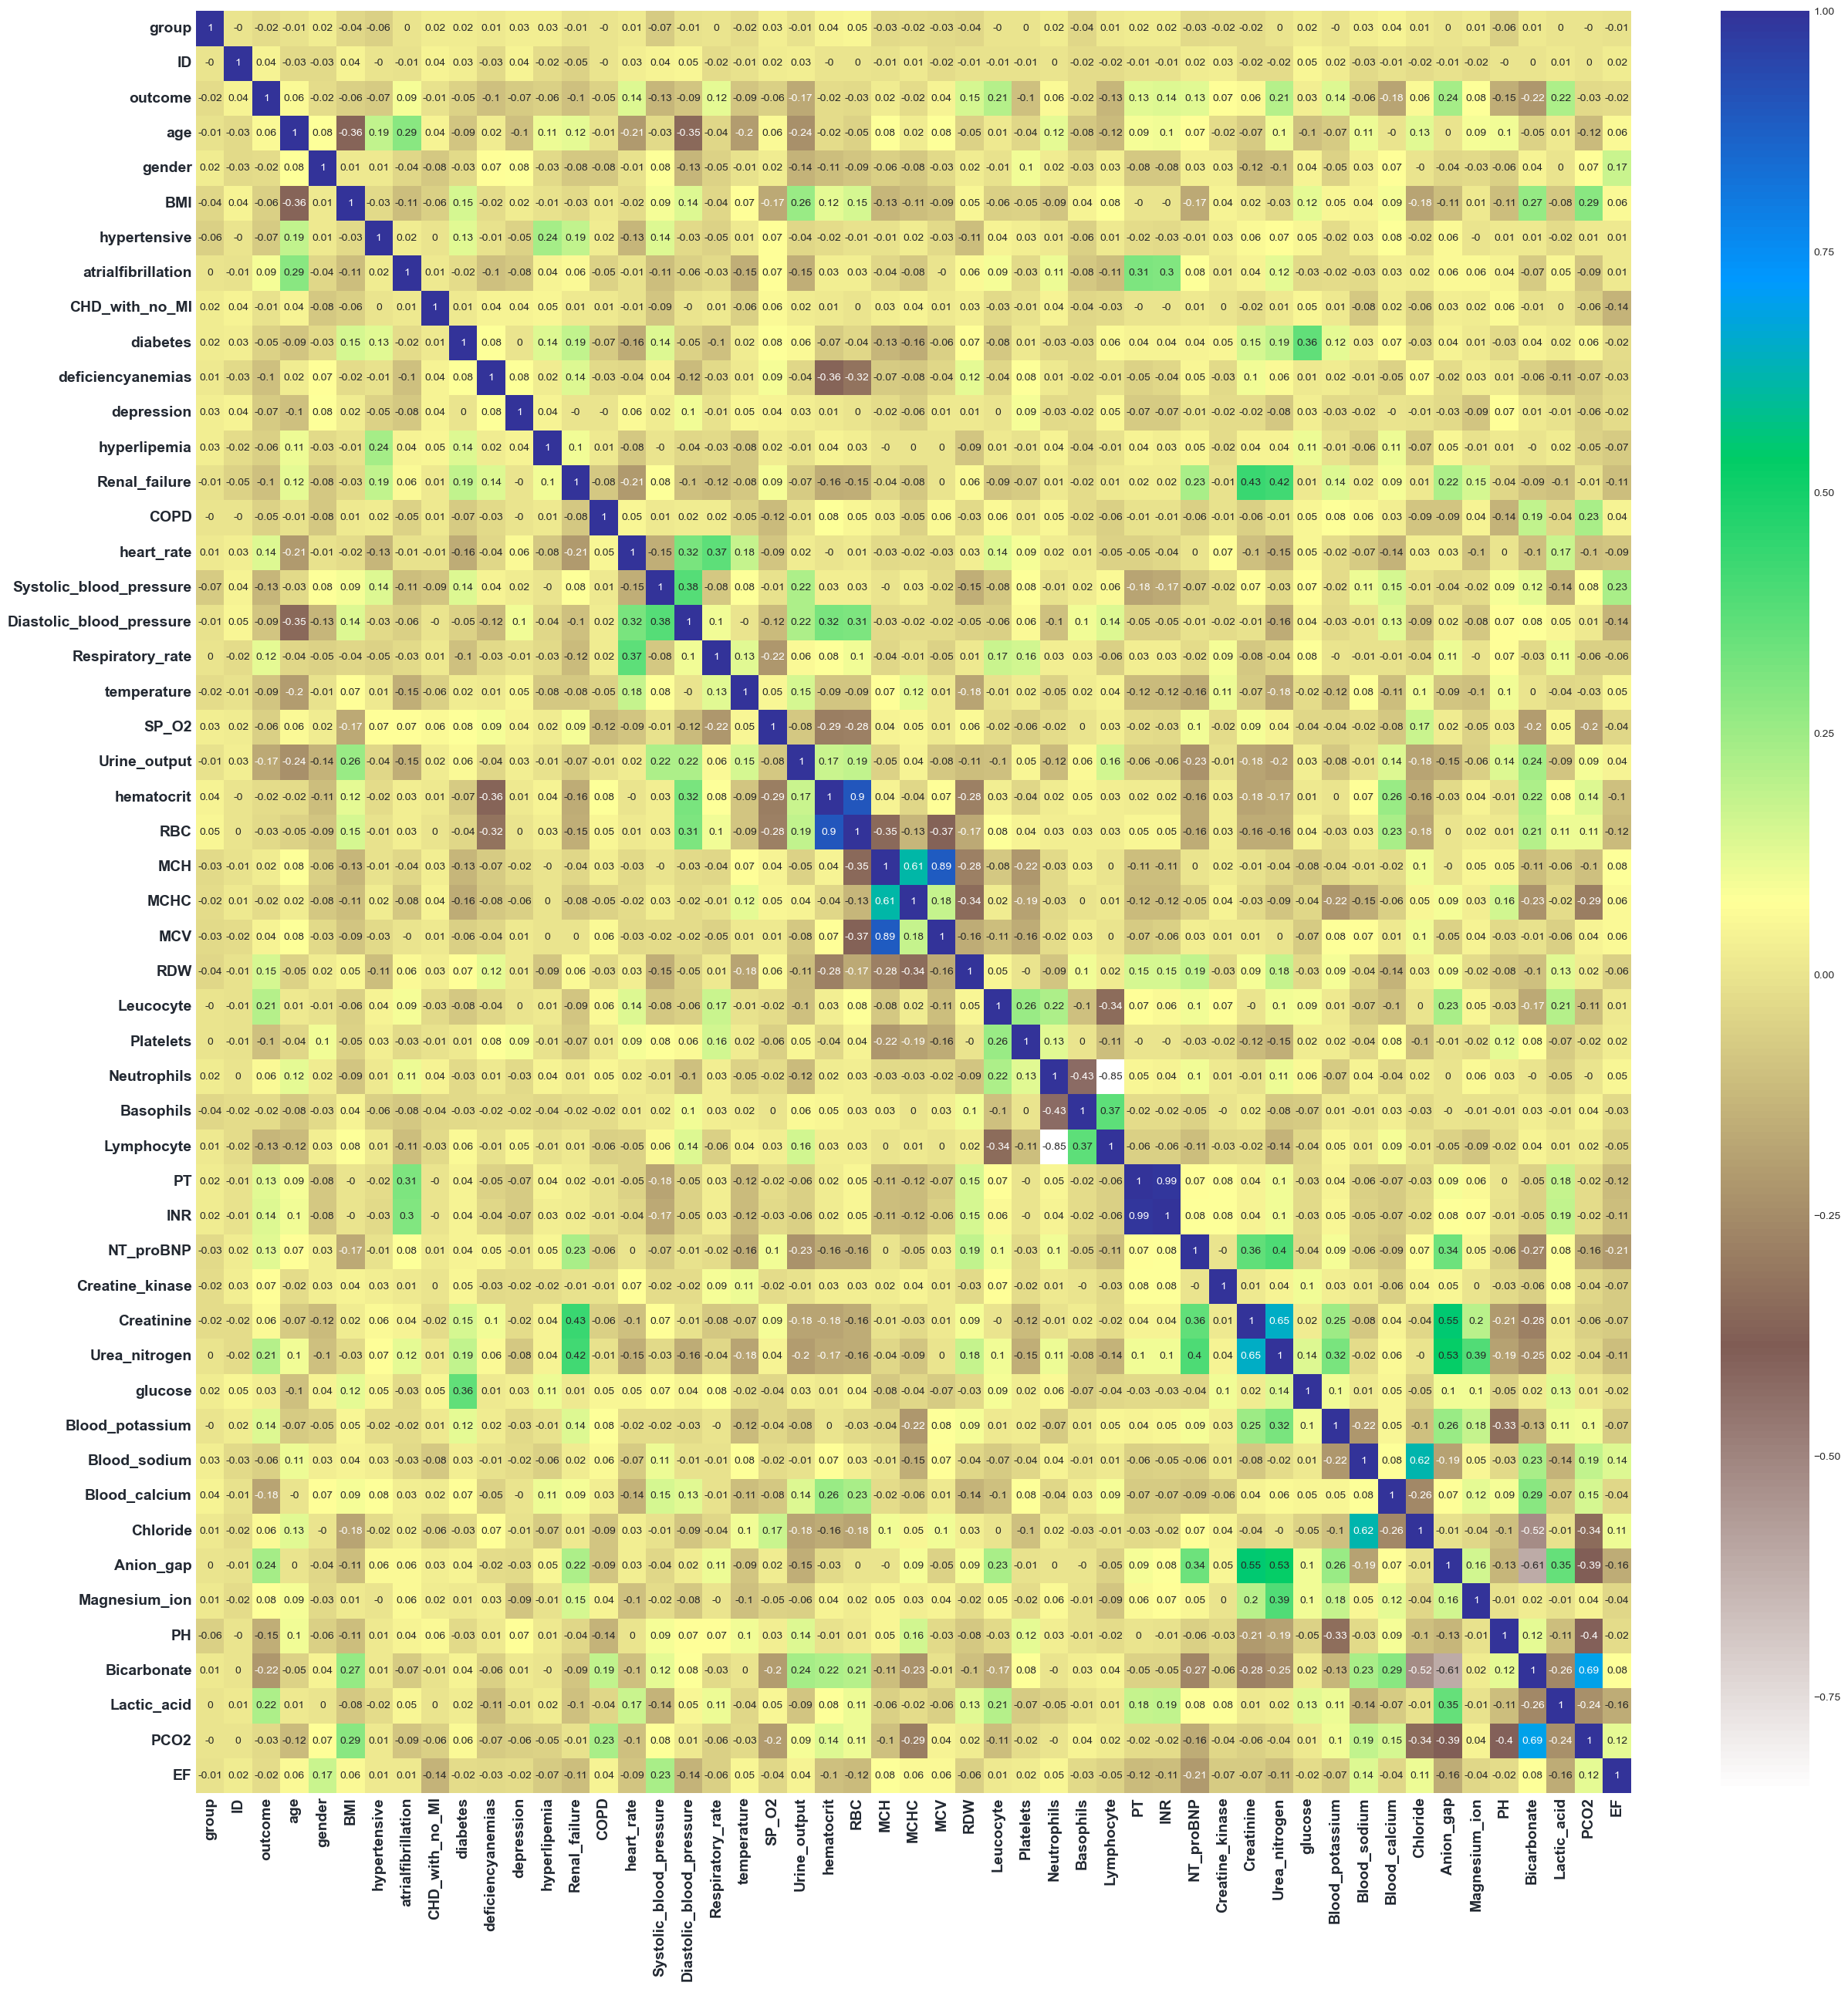

In [19]:
import seaborn as sns
plt.figure(figsize = (30,30))
plt.style.use('seaborn-white')
plt.xticks(color="#222831", weight='bold',size=14)
plt.yticks(color="#222831", weight='bold',size=14)
sns.heatmap(data=correlation,cmap='terrain_r',annot=True)
plt.show()

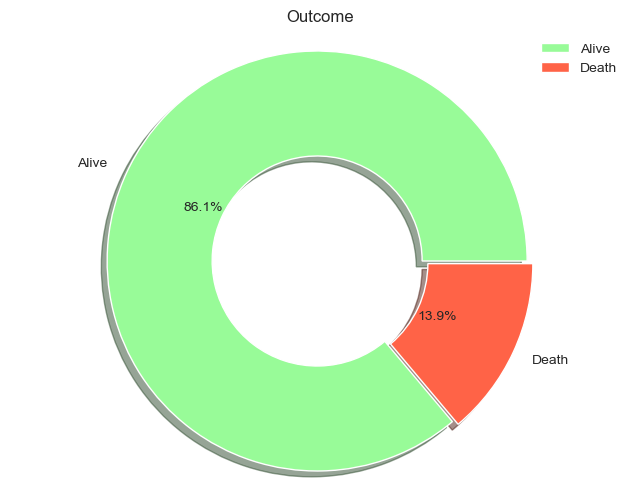

In [20]:
# Outcome distribution from Pie Chart

import matplotlib.pyplot as plt

data = project.outcome.value_counts()
plt.style.use('seaborn-white')
colors = ['#98FB98', '#FF6347']
explode = (0.015, 0.015)
plt.figure(figsize=(8, 6))
plt.pie(data, labels=['Alive', 'Death'], colors=colors, autopct='%1.1f%%',explode=explode, shadow=True, wedgeprops=dict(width=0.5, edgecolor='white'))
plt.gca().add_artist(plt.Circle((0, 0), 0.4, color='white'))
plt.title("Outcome")
plt.legend()
plt.axis('equal')
plt.show()

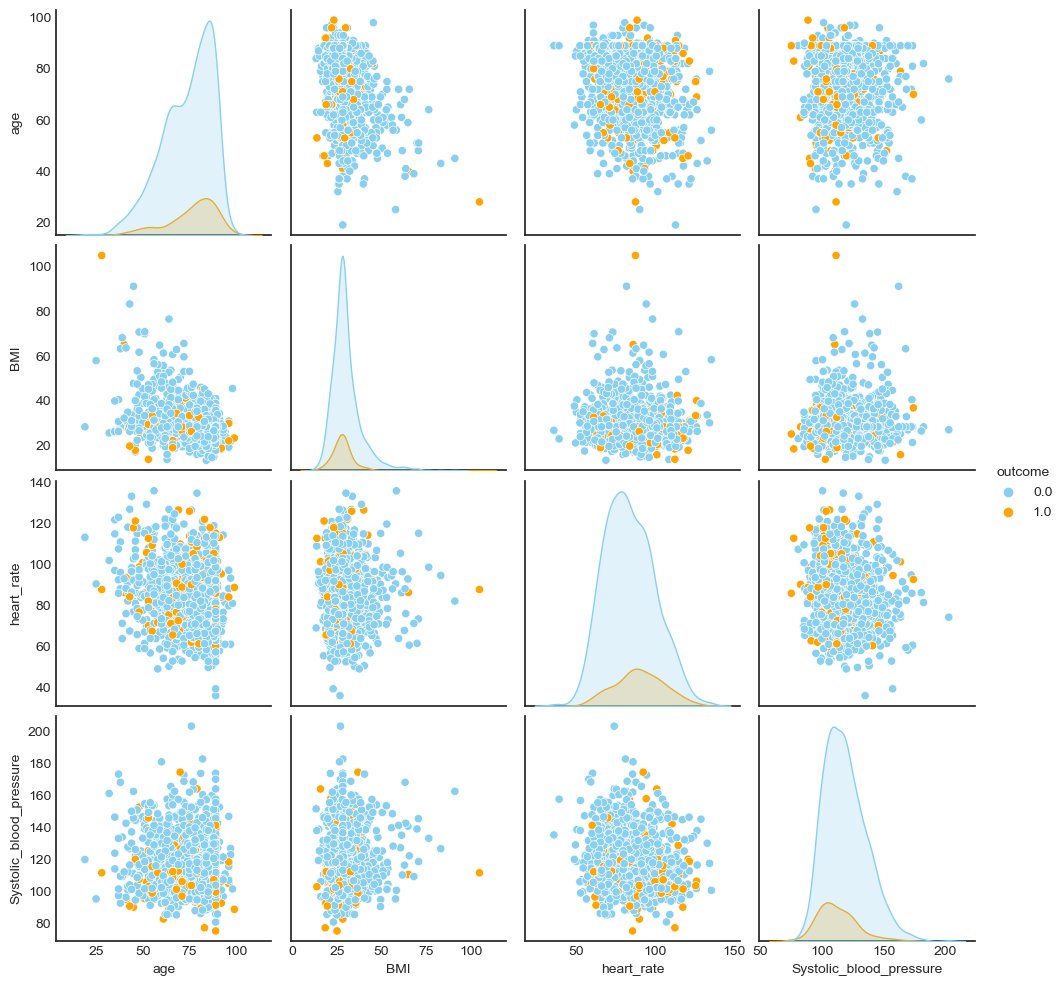

<Figure size 1800x1400 with 0 Axes>

In [21]:
# Pairplot for Age, BMI, Heart rate, Systolic blood pressure

for_plot = ['age', 'BMI', 'heart_rate', 'Systolic_blood_pressure']

pair_plot = sns.pairplot(project, hue='outcome', vars=for_plot, palette={0: '#89CFF0', 1: 'orange'})
plt.figure(figsize=(18, 14))

plt.style.use('seaborn-white')

plt.show()

## Interactive plots by using plotly

In [22]:
project['outcome_temp'] = project['outcome'].replace({0: 'Alive', 1: 'Dead'})
fig1=px.histogram(project, x='BMI', title= 'BMI Vs Outcome', color='outcome_temp')
fig1.show()
project.drop('outcome_temp', axis=1, inplace=True)

In [23]:
project['hypertensive'] = project['hypertensive'].astype(str)
project['outcome_temp'] = project['outcome'].replace({0: 'Alive', 1: 'Dead'})
fig=px.histogram(project, x='hypertensive', title= 'Hypertensive Vs Outcome', color='outcome_temp')
fig.update_xaxes(tickvals=[0, 1], ticktext=['with Hypertensive', 'without Hypertensive'])
fig.show()
project.drop('outcome_temp', axis=1, inplace=True)

In [24]:
project['diabetes'] = project['diabetes'].astype(str)
project['outcome_temp'] = project['outcome'].replace({0: 'Alive', 1: 'Dead'})

fig=px.histogram(project, x='diabetes', title= 'Diabetes Vs Outcome', color='outcome_temp')
fig.update_xaxes(tickvals=[0, 1], ticktext=['with diabetes', 'without diabetes'])
fig.show()
project.drop('outcome_temp', axis=1, inplace=True)

In [25]:
project['outcome_temp'] = project['outcome'].replace({0: 'Alive', 1: 'Dead'})
fig2=px.histogram(project, x='age', title= 'age Vs Outcome', color='outcome_temp')

fig2.show()
project.drop('outcome_temp', axis=1, inplace=True)

In [26]:
project['depression'] = project['depression'].astype(str)
project['outcome_temp'] = project['outcome'].replace({0: 'Alive', 1: 'Dead'})

fig=px.histogram(project, x='depression', title= 'Depression Vs Outcome', color='outcome_temp')
fig.update_xaxes(tickvals=[0, 1], ticktext=['with depression', 'without depression'])
fig.show()
project.drop('outcome_temp', axis=1, inplace=True)

## Predictor selection

In [27]:
project.columns

Index(['group', 'ID', 'outcome', 'age', 'gender', 'BMI', 'hypertensive',
       'atrialfibrillation', 'CHD_with_no_MI', 'diabetes', 'deficiencyanemias',
       'depression', 'hyperlipemia', 'Renal_failure', 'COPD', 'heart_rate',
       'Systolic_blood_pressure', 'Diastolic_blood_pressure',
       'Respiratory_rate', 'temperature', 'SP_O2', 'Urine_output',
       'hematocrit', 'RBC', 'MCH', 'MCHC', 'MCV', 'RDW', 'Leucocyte',
       'Platelets', 'Neutrophils', 'Basophils', 'Lymphocyte', 'PT', 'INR',
       'NT_proBNP', 'Creatine_kinase', 'Creatinine', 'Urea_nitrogen',
       'glucose', 'Blood_potassium', 'Blood_sodium', 'Blood_calcium',
       'Chloride', 'Anion_gap', 'Magnesium_ion', 'PH', 'Bicarbonate',
       'Lactic_acid', 'PCO2', 'EF'],
      dtype='object')

In [28]:


formula = (
    'project.outcome ~ age + gender + BMI + hypertensive + atrialfibrillation + '
    'CHD_with_no_MI + diabetes + deficiencyanemias + depression + hyperlipemia + '
    'Renal_failure + COPD + heart_rate + Systolic_blood_pressure + '
    'Diastolic_blood_pressure + Respiratory_rate + temperature + SP_O2 + '
    'Urine_output + hematocrit + RBC + MCH + MCHC + MCV + RDW + Leucocyte + '
    'Platelets + Neutrophils + Basophils + Lymphocyte + PT + INR + NT_proBNP + '
    'Creatine_kinase + Creatinine + Urea_nitrogen + glucose + Blood_potassium + '
    'Blood_sodium + Blood_calcium + Chloride + Anion_gap + Magnesium_ion + PH + '
    'Bicarbonate + Lactic_acid + PCO2 + EF'
)

res = smf.ols(formula=formula, data=project).fit()
print(res.summary())


                            OLS Regression Results                            
Dep. Variable:        project.outcome   R-squared:                       0.266
Model:                            OLS   Adj. R-squared:                  0.233
Method:                 Least Squares   F-statistic:                     8.024
Date:                Mon, 11 Dec 2023   Prob (F-statistic):           9.07e-45
Time:                        16:46:24   Log-Likelihood:                -223.95
No. Observations:                1111   AIC:                             545.9
Df Residuals:                    1062   BIC:                             791.5
Df Model:                          48                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
Intercept               

#### From the above OLS tabel we can see that deficiencyanemias, Renal_failure, COPD, heart_rate, Diastolic_blood_pressure, temperature, Urine_output, Creatinine, Platelets, Urea_nitrogen, Blood_calcium, Lactic_acid, PCO2 are significant predictors because their p-value is less than alpha. 

# Models building


## Logistic Regression

In [29]:
sc = StandardScaler()

In [30]:
X = project[['deficiencyanemias','Renal_failure','COPD','heart_rate','Diastolic_blood_pressure','temperature', 'Urine_output', 'Creatinine', 'Platelets',
             'Urea_nitrogen','Blood_calcium','Lactic_acid','PCO2',]]
X_scaled = sc.fit_transform(X)
X=X_scaled

Y = project['outcome']
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, stratify=Y,random_state=42)

In [31]:

model_Lg = LogisticRegression()

param_grid = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100],  
    'penalty': ['l1', 'l2'],  
    'max_iter': [100, 200, 300],  
    'solver': ['liblinear', 'saga']
}

grid_search = GridSearchCV(model_Lg, param_grid, cv=5, scoring='accuracy')

grid_search.fit(x_train, y_train)

print("Best parameters: ", grid_search.best_params_)

print("Best cross-validation score: ", grid_search.best_score_)


Best parameters:  {'C': 0.1, 'max_iter': 100, 'penalty': 'l2', 'solver': 'saga'}
Best cross-validation score:  0.8817431600330096


In [32]:
model_lg = LogisticRegression(C=0.1,max_iter=100,penalty='l2', solver='saga',)
model_lg.fit(x_train, y_train)
y_pred = model_lg.predict(x_test)
accuracy = accuracy_score(y_test, y_pred)

print("Logistic Regression Accuracy = ", accuracy*100)

Logistic Regression Accuracy =  89.68609865470853


In [33]:

lg_cvscore = cross_val_score(model_lg,X,Y,cv=10).mean()
print("Confusion Matrix:\n", lg_cvscore)
train_accuracy = model_lg.score(x_train, y_train)
print("Train Accuracy: ", train_accuracy * 100)
test_accuracy = model_lg.score(x_test,y_test)
print("Test Accuracy: ", test_accuracy * 100)

Confusion Matrix:
 0.883011583011583
Train Accuracy:  88.51351351351352
Test Accuracy:  89.68609865470853


In [34]:
print('\n\n', metrics.classification_report(y_test, y_pred))



               precision    recall  f1-score   support

         0.0       0.90      0.99      0.94       192
         1.0       0.83      0.32      0.47        31

    accuracy                           0.90       223
   macro avg       0.87      0.66      0.70       223
weighted avg       0.89      0.90      0.88       223



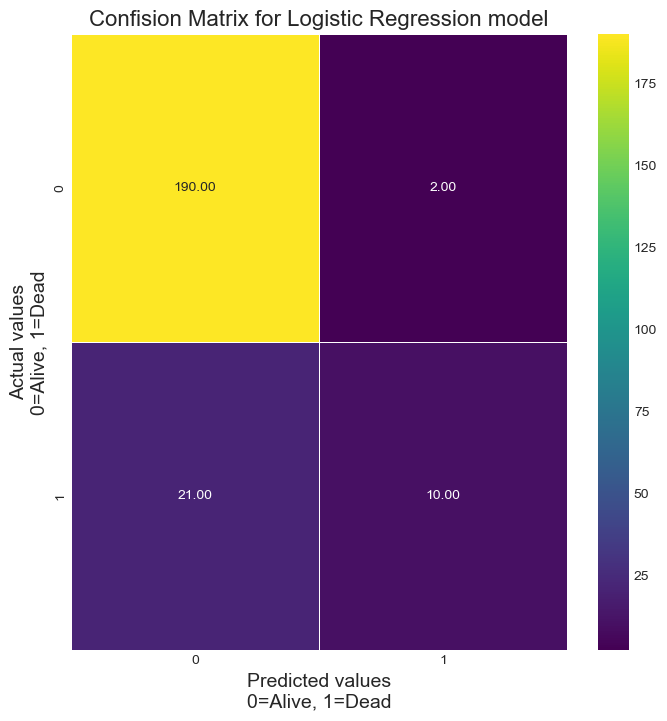

In [35]:
lg_cm = confusion_matrix(y_test,y_pred)
f, ax = plt.subplots(figsize=(8,8))
sns.heatmap(lg_cm, annot=True, linewidth=0.7, fmt=".2f",  cmap='viridis')
plt.title('Confision Matrix for Logistic Regression model', size=16)
plt.xlabel('Predicted values\n0=Alive, 1=Dead', size=14)
plt.ylabel('Actual values\n0=Alive, 1=Dead', size=14)
plt.show()

## KNN

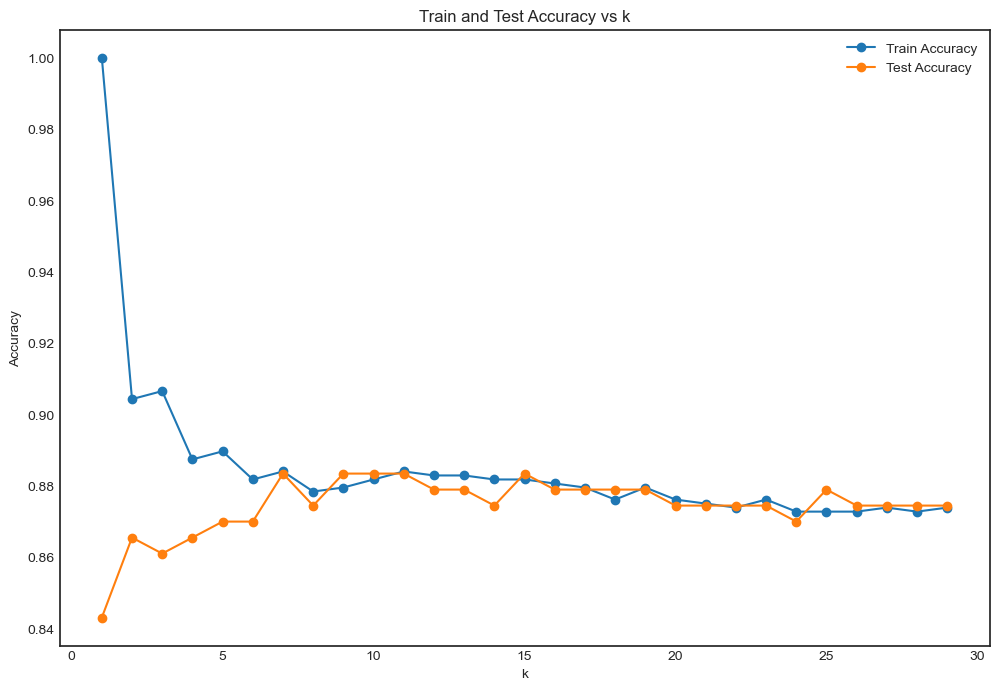

In [36]:
# KNN
train_accuracy = []
test_accuracy = []
for k in range(1, 30):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(x_train, y_train)
    train_accuracy.append(knn.score(x_train, y_train))
    test_accuracy.append(knn.score(x_test, y_test))

plt.figure(figsize=(12, 8))
plt.plot(range(1, 30), train_accuracy, label='Train Accuracy', marker='o')
plt.plot(range(1, 30), test_accuracy, label='Test Accuracy', marker='o')
plt.xlabel('k')
plt.ylabel('Accuracy')
plt.title('Train and Test Accuracy vs k')
plt.legend()
plt.show()

In [37]:
knn_model = KNeighborsClassifier(n_neighbors=2,  algorithm = 'auto')
knn_model.fit(x_train, y_train)
y_pred = knn_model.predict(x_test)
x = metrics.accuracy_score(y_test, y_pred)

print("KNN Accuracy = ", x*100)

KNN Accuracy =  86.54708520179372


In [38]:
KNN_CVscore = cross_val_score(knn_model,X,Y,cv=10).mean()
print('Cross validation score: ',KNN_CVscore)
knn_train_accuracy = knn_model.score(x_train,y_train)
print('Train Accuracy is = ',knn_model.score(x_train,y_train)*100)
knn_test_accuracy = knn_model.score(x_test,y_test)
print('Test Accuracy = ',knn_model.score(x_test,y_test)*100)

Cross validation score:  0.8686052123552124
Train Accuracy is =  90.42792792792793
Test Accuracy =  86.54708520179372


In [39]:
print('\n\n', metrics.classification_report(y_test, y_pred))



               precision    recall  f1-score   support

         0.0       0.88      0.98      0.93       192
         1.0       0.56      0.16      0.25        31

    accuracy                           0.87       223
   macro avg       0.72      0.57      0.59       223
weighted avg       0.83      0.87      0.83       223



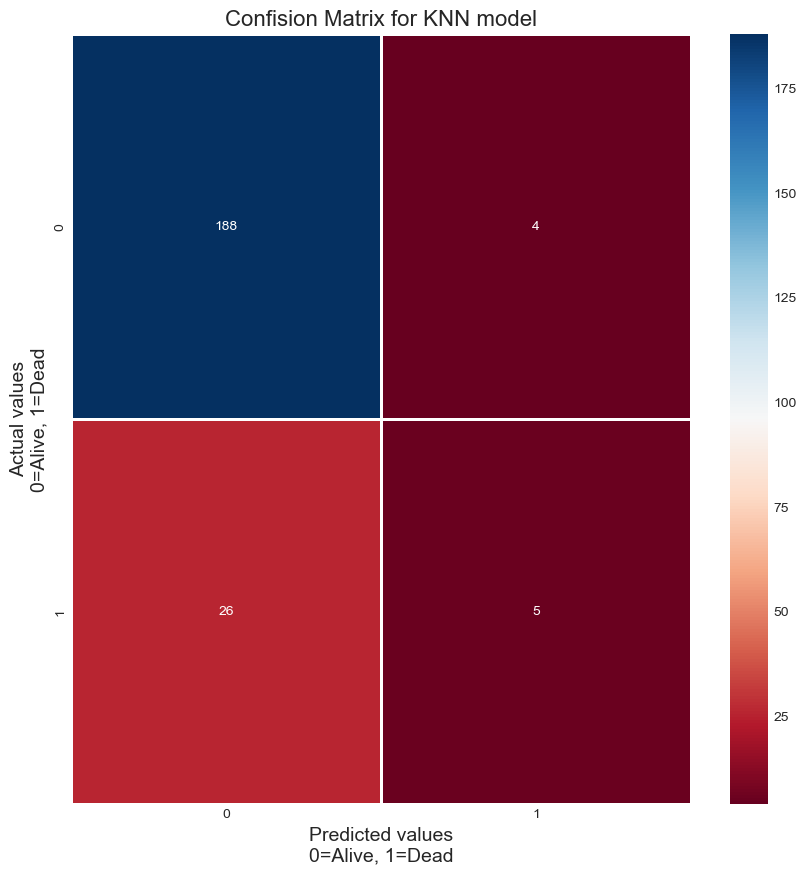

In [40]:
Knn_CM = confusion_matrix(y_test,y_pred)
f,ax = plt.subplots(figsize=(10,10))
sns.heatmap(Knn_CM, annot=True, linewidth=1.0, fmt=".0f",cmap='RdBu')
plt.title('Confision Matrix for KNN model', size=16)
plt.xlabel('Predicted values\n0=Alive, 1=Dead', size=14)
plt.ylabel('Actual values\n0=Alive, 1=Dead', size=14)
plt.show()


## Support Vector Machine 

In [41]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import Pipeline

pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('smote', SMOTE()),  
    ('svm', SVC(kernel='rbf', class_weight='balanced')) 
])
param_grid = { 'svm__C': [0.1, 1, 10],  'svm__gamma': ['scale', 'auto']}
grid_search = GridSearchCV(pipeline, param_grid, cv=5, scoring='precision_macro')

grid_search.fit(x_train, y_train)

print("Best parameters: ", grid_search.best_params_)

Best parameters:  {'svm__C': 0.1, 'svm__gamma': 'auto'}


In [42]:
final_svm = grid_search.best_estimator_
y_pred = final_svm.predict(x_test)

print("Accuracy for SVM model:", accuracy_score(y_test, y_pred) * 100)


Accuracy for SVM model: 77.13004484304933


In [43]:
svm_train_accuracy = final_svm.score(x_train,y_train)
print("Training accuracy for SVM model= ",final_svm.score(x_train,y_train)*100)
svm_test_accuracy= final_svm.score(x_test,y_test)
print("Testing accuracy for SVM model",final_svm.score(x_test,y_test)*100)
svm_cvscore = cross_val_score(final_svm,X,Y,cv=10).mean()
print('Cross validation score for SVM model:',svm_cvscore*100)

Training accuracy for SVM model=  81.98198198198197
Testing accuracy for SVM model 77.13004484304933
Cross validation score for SVM model: 77.8555341055341


In [44]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         0.0       0.92      0.81      0.86       192
         1.0       0.31      0.55      0.40        31

    accuracy                           0.77       223
   macro avg       0.62      0.68      0.63       223
weighted avg       0.83      0.77      0.79       223



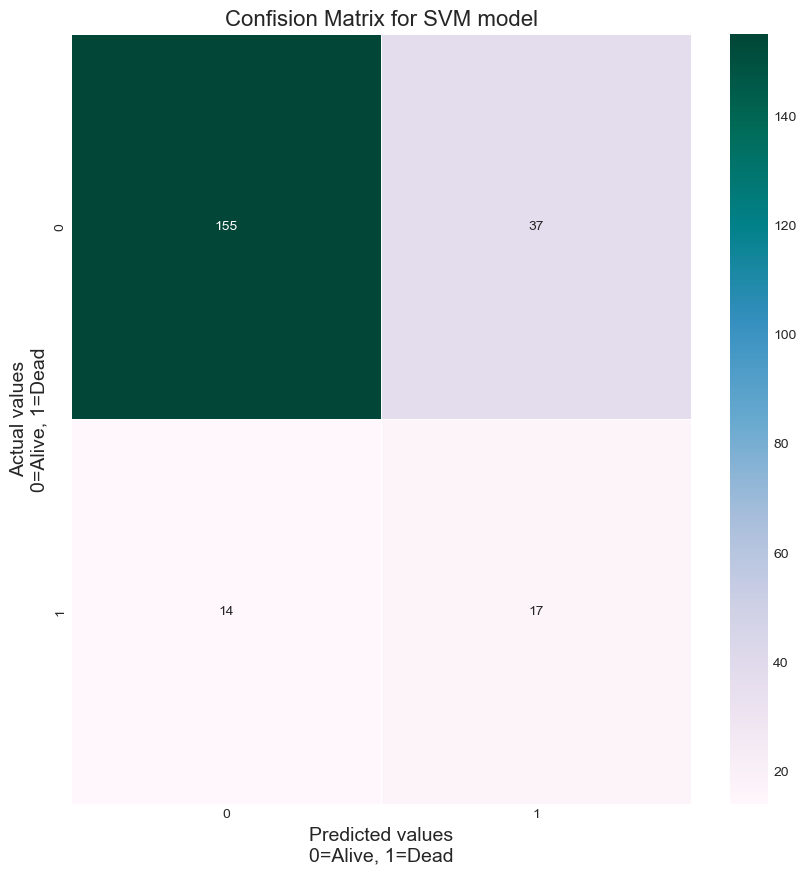

In [45]:
SVM_cm = confusion_matrix(y_test,y_pred)
f, ax = plt.subplots(figsize=(10,10))
sns.heatmap(SVM_cm, annot=True, linewidth=0.5, fmt=".0f",  cmap='PuBuGn')
plt.title('Confision Matrix for SVM model', size=16)
plt.xlabel('Predicted values\n0=Alive, 1=Dead', size=14)
plt.ylabel('Actual values\n0=Alive, 1=Dead', size=14)
plt.show()


## Decision Tree

In [46]:
pipeline = Pipeline([
    ('smote', SMOTE()),
    ('dtc', DecisionTreeClassifier(criterion='entropy', random_state=42, class_weight='balanced'))
])
param_grid = {
    'dtc__max_depth': [2, 3, 4, 5, 6, 7, 8, 10],
    'dtc__min_samples_split': [2, 5, 10],
    'dtc__min_samples_leaf': [1, 2, 4]
}

grid_search = GridSearchCV(pipeline, param_grid, cv=5, scoring='f1_macro')
grid_search.fit(x_train, y_train)
print("Best parameters: ", grid_search.best_params_)

Best parameters:  {'dtc__max_depth': 10, 'dtc__min_samples_leaf': 2, 'dtc__min_samples_split': 5}


In [47]:
final_dtc = grid_search.best_estimator_
y_pred = final_dtc.predict(x_test)

print("Accuracy of Decision Tree model:", accuracy_score(y_test, y_pred) * 100)

Accuracy of Decision Tree model: 76.23318385650224


In [48]:
dtc_cvs= cross_val_score(final_dtc, X, Y, cv=10).mean()
print("Cross validation score= ", dtc_cvs)

dtc_train_accuracy= final_dtc.score(x_train, y_train)
print("Training Accuracy for Decision Tree model= ", dtc_train_accuracy)

dtc_test_accuracy= final_dtc.score(x_test, y_test)
print("Testing Accuracy for Decision Tree model= ", dtc_test_accuracy)

Cross validation score=  0.7650740025740026
Training Accuracy for Decision Tree model=  0.9605855855855856
Testing Accuracy for Decision Tree model=  0.7623318385650224


In [49]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         0.0       0.92      0.79      0.85       192
         1.0       0.31      0.58      0.40        31

    accuracy                           0.76       223
   macro avg       0.62      0.69      0.63       223
weighted avg       0.84      0.76      0.79       223



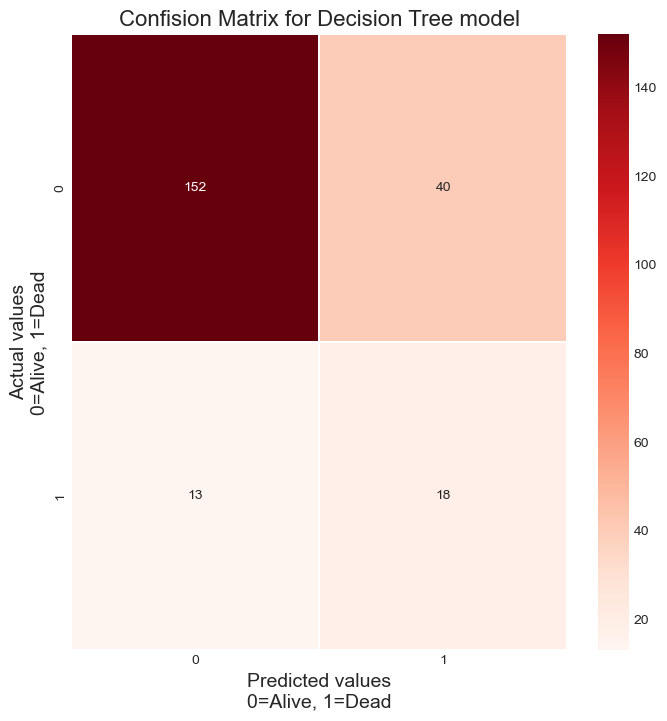

In [50]:
dtc_conmat= confusion_matrix(y_test, y_pred)
f, ax= plt.subplots(figsize=(8, 8))
sns.heatmap(dtc_conmat, annot= True, linewidth= 0.01, fmt= 'g', cmap= 'Reds', ax= ax)
plt.title('Confision Matrix for Decision Tree model', size=16)
plt.xlabel('Predicted values\n0=Alive, 1=Dead', size=14)
plt.ylabel('Actual values\n0=Alive, 1=Dead', size=14)
plt.show()

## Random Forest

In [51]:
# Random Forest
rfc_model= RandomForestClassifier(n_estimators= 15, random_state= 42)
rfc_model.fit(x_train, y_train)
y_predict= rfc_model.predict(x_test)

acc= metrics.accuracy_score(y_test, y_predict)
print("Accuracy of Random forest model= ", acc*100)


Accuracy of Random forest model=  87.89237668161435


In [52]:
cvs= cross_val_score(rfc_model, X, Y, cv=15).mean()
print("Cross validation score= ", cvs)
train_accuracy= rfc_model.score(x_train, y_train)
print("Training Accuracy for Random forest model= ", train_accuracy*100)

test_accuracy= rfc_model.score(x_test, y_test)
print("Testing Accuracy for Random forest model= ", test_accuracy*100)

Cross validation score=  0.8704144144144144
Training Accuracy for Random forest model=  99.43693693693693
Testing Accuracy for Random forest model=  87.89237668161435


In [53]:
print(metrics.classification_report(y_test, y_predict))

              precision    recall  f1-score   support

         0.0       0.88      0.99      0.93       192
         1.0       0.75      0.19      0.31        31

    accuracy                           0.88       223
   macro avg       0.82      0.59      0.62       223
weighted avg       0.87      0.88      0.85       223



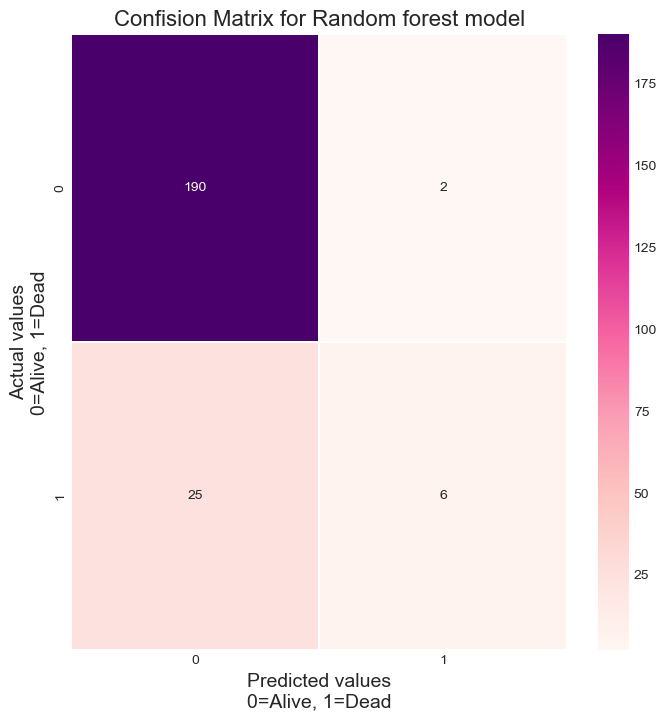

In [54]:
rfc_conmat= confusion_matrix(y_test, y_predict)
f, ax= plt.subplots(figsize=(8, 8))
sns.heatmap(rfc_conmat, annot= True, linewidth= 0.1, fmt= '.0f', cmap= 'RdPu', ax= ax)
plt.title('Confision Matrix for Random forest model', size=16)
plt.xlabel('Predicted values\n0=Alive, 1=Dead', size=14)
plt.ylabel('Actual values\n0=Alive, 1=Dead', size=14)
plt.show()

## Comparision of Models

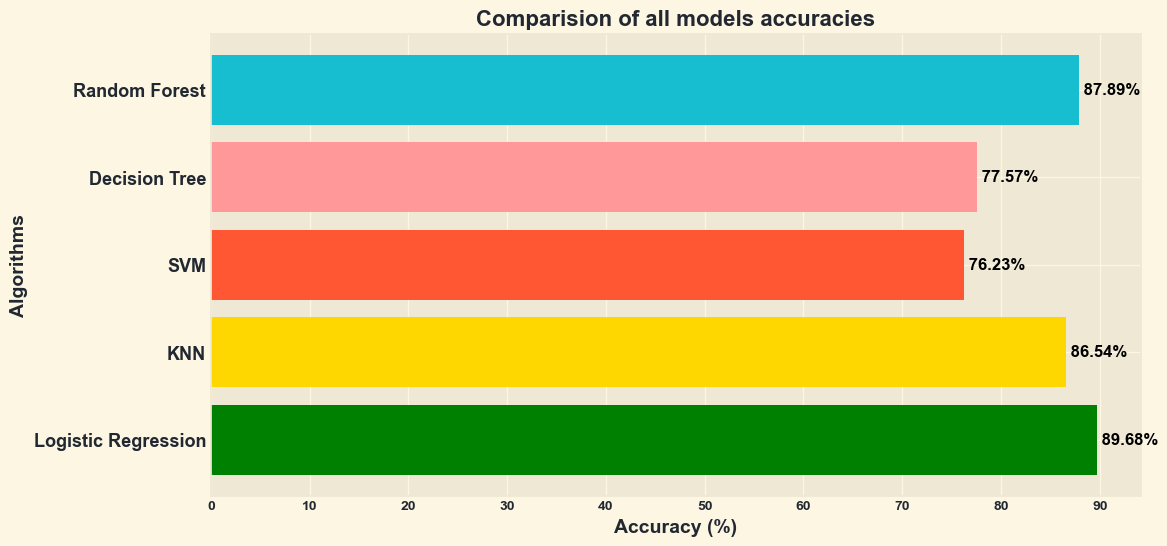

In [55]:

models_accuracies = {
    "Logistic Regression": 89.68,
    "KNN": 86.54,
    "SVM": 76.23,
    "Decision Tree": 77.57,
    "Random Forest": 87.89
}
colors = ["#008000", "#ffd700", "#FF5733", "#FF9999", "#17BECF"]
plt.style.use('Solarize_Light2')

plt.figure(figsize=(12, 6))
plt.xticks(np.arange(0, 100, 10),color="#222831", weight='bold')
plt.yticks(color="#222831", weight='bold', size=13)
plt.xlabel("Accuracy (%)", size=14,weight='bold', color="#222831")
plt.ylabel("Algorithms",size=14,weight='bold', color="#222831")
plt.title("Comparision of all models accuracies", size=16, weight='bold',color="#222831")
plt.barh(list(models_accuracies.keys()), list(models_accuracies.values()), color=colors)

for index, value in enumerate(models_accuracies.values()):
    plt.text(value, index, f' {value}%', va='center',color='black', weight='bold', size=12)
plt.show()


## From the above comparision we can say the Logistic Regression model is the best for prediction for our dataset along the with the accuracy, the metrics like precision, recall were also best for this model when compared to the other. 